## Problem Statement
The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on
the Zomato Dataset and build an appropriate Machine Learning Model that will help
various Zomato Restaurants to predict their respective Ratings based on certain
features.

## Approach: 
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

## Results: 
You have to build a solution that should able to predict the ratings of the
restaurants listed in the dataset.

Importing the required libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
#load the dataset
df = pd.read_csv('zomato.csv')

create a shallow copy of a dataframe

In [7]:
dfCopy = df.copy()


### Columns description
url contains the url of the restaurant in the zomato website

address contains the address of the restaurant in Bengaluru

name contains the name of the restaurant

online_order whether online ordering is available in the restaurant or not

book_table table book option available or not

rate contains the overall rating of the restaurant out of 5

votes contains total number of rating for the restaurant as of the above mentioned date

phone contains the phone number of the restaurant

location contains the neighborhood in which the restaurant is located

rest_type restaurant type

dish_liked dishes people liked in the restaurant

cuisines food styles, separated by comma

approx_cost(for two people) contains the approximate cost for meal for two people

reviews_list list of tuples containing reviews for the restaurant, each tuple

menu_item contains list of menus available in the restaurant

listed_in(type) type of meal

listed_in(city) contains the neighborhood in which the restaurant is listed

In [8]:
df.shape

(51717, 17)

In [9]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
# Find out the types of all columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [12]:
#checking duplicate value
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

Only Vote column is neumeric rest all dependent categorical features we need to convert to neumeric

In [14]:
df.columns[df.isnull().any()].tolist() #df.isna().any()

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

Drop not required columns

In [15]:
df.drop(columns =['dish_liked' ],axis=1, inplace = True)
df.drop(columns =['url' ],axis=1, inplace = True)
df.drop(columns =['phone' ],axis=1, inplace = True)

Rename the columns 

In [16]:
df.rename(columns={"listed_in(city)":"city"}, inplace = True)
df.rename(columns={"approx_cost(for two people)":"cost"}, inplace = True)
df.rename(columns={"listed_in(type)":"type"}, inplace = True)

In [17]:
df.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

Rate column should be in proper format

In [18]:
# new data frame with split value columns
new = df["rate"].str.split("/", n = 1, expand = True)
  
df["rating"]= new[0]
  
# Dropping old columns
df.drop(columns =["rate"], inplace = True)
  

In [19]:
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

Replace non neumeric data to 0

In [20]:
#df["rating"] = df["rating"].fillna('0')
#df["rating"].replace("-", "0",inplace = True)
#df["rating"].replace("NEW", "0", inplace = True)

In [21]:
df.dropna(axis='index',subset=['rating'],inplace=True)
df["rating"].replace("-", "0",inplace = True)
df["rating"].replace("NEW", "0", inplace = True)

In [22]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [23]:
df.isna().sum()

name                0
online_order        0
book_table          0
votes               0
location            0
rest_type         151
dish_liked      20333
cuisines           11
cost              252
menu_item           0
type                0
city                0
rating              0
dtype: int64

In [24]:
df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', nan, '2,200',
       '2,000', '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '360', '6,000',
       '1,050', '2,300', '4,100', '120', '5,000', '3,700', '1,650',
       '2,700', '4,500'], dtype=object)

In [25]:
df["cost"] = df["cost"].fillna('0')

In [26]:
df["cost"]= pd.to_numeric(df["cost"], errors='coerce')

<AxesSubplot:xlabel='name'>

C:\Users\Narshinh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Narshinh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Narshinh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Narshinh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


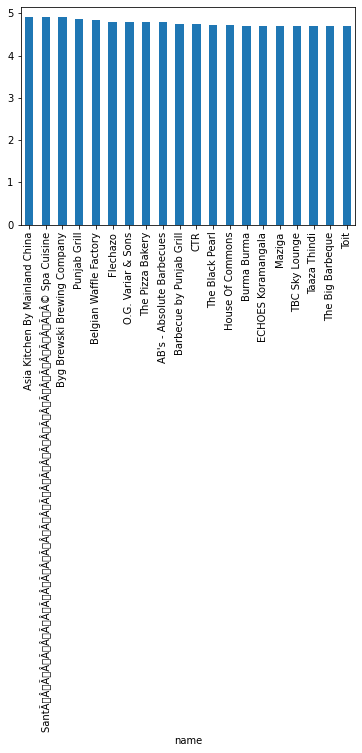

In [27]:
df.groupby('name')['rating'].mean().nlargest(20).plot.bar()

In [28]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode label columns.
df["name"]= label_encoder.fit_transform(df["name"])
df["online_order"]= label_encoder.fit_transform(df["online_order"]) #df['online_order']=df['online_order'].map({'Yes': '1', 'No':'0'})  # mapping method cat to num
df["book_table"]= label_encoder.fit_transform(df["book_table"])
df["type"]= label_encoder.fit_transform(df["type"])
df["city"]= label_encoder.fit_transform(df["city"])

In [29]:
df["location"]= label_encoder.fit_transform(df["location"].astype(str))
df["rest_type"]= label_encoder.fit_transform(df["rest_type"].astype(str))
df["dish_liked"]= label_encoder.fit_transform(df["dish_liked"].astype(str))
df["menu_item"]= label_encoder.fit_transform(df["menu_item"].astype(str))
df["cuisines"]= label_encoder.fit_transform(df["cuisines"].astype(str))


In [30]:
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city,rating
0,3028,1,1,775,1,24,3650,2000,800.0,8588,0,1,4.1
1,5718,1,0,787,1,24,2963,864,800.0,8588,0,1,4.1
2,5302,1,0,918,1,19,1416,692,800.0,8588,0,1,3.8
3,150,0,0,88,1,73,2765,2350,300.0,8588,0,1,3.7
4,2437,0,0,166,4,24,3452,2029,600.0,8588,0,1,3.8


In [31]:
df.dtypes

name              int32
online_order      int32
book_table        int32
votes             int64
location          int32
rest_type         int32
dish_liked        int32
cuisines          int32
cost            float64
menu_item         int32
type              int32
city              int32
rating          float64
dtype: object

<AxesSubplot:>

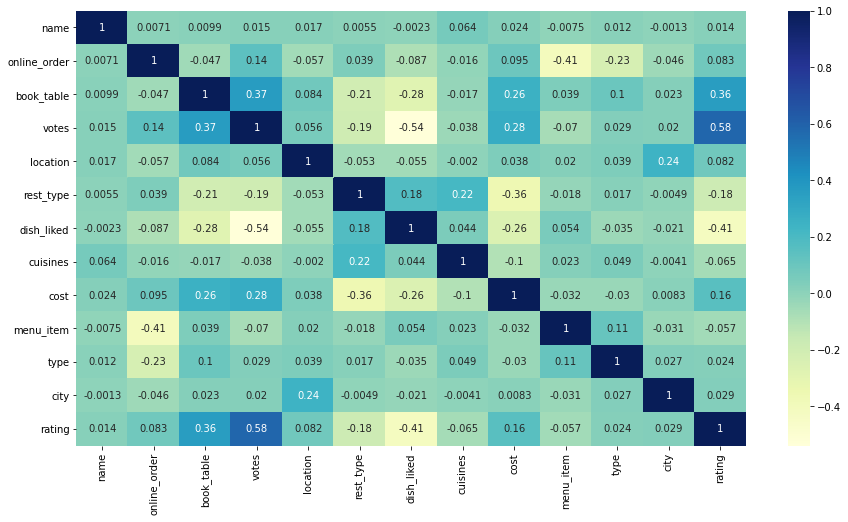

In [26]:
#Get Correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

votes and rating are highly correlated

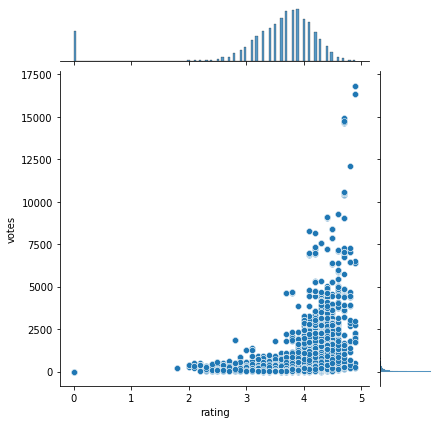

In [27]:
sns.jointplot(x='rating',y='votes',data=df)

<AxesSubplot:xlabel='book_table', ylabel='votes'>

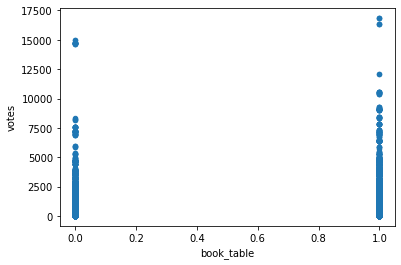

In [28]:
df.plot.scatter(x = 'book_table', y = 'votes') # this is second highly correlated 

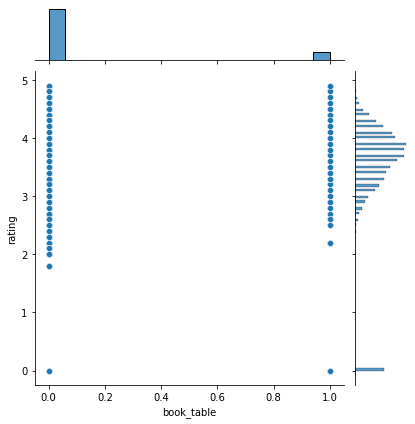

In [29]:
sns.jointplot(x='book_table',y='rating',data=df)

<AxesSubplot:xlabel='location', ylabel='city'>

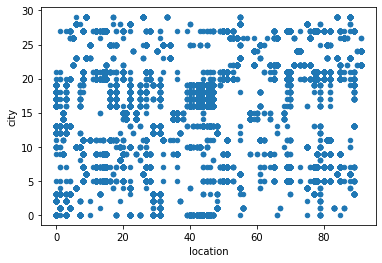

In [30]:
df.plot.scatter(x = 'location', y = 'city') 

Lets perform train test split on dataset 

In [32]:
df.isnull().any()

name            False
online_order    False
book_table      False
votes           False
location        False
rest_type       False
dish_liked      False
cuisines        False
cost             True
menu_item       False
type            False
city            False
rating          False
dtype: bool

In [33]:
df["cost"].unique()

array([800., 300., 600., 700., 550., 500., 450., 650., 400., 900., 200.,
       750., 150., 850., 100.,  nan, 350., 250., 950., 199.,  80., 160.,
       230., 130.,   0., 180., 330.,  50.,  40.,  70., 560., 240., 360.,
       120.])

In [34]:
df["cost"] = df["cost"].fillna(0)

In [35]:
X = df.loc[:, df.columns != 'rating']
X

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,3028,1,1,775,1,24,3650,2000,800.0,8588,0,1
1,5718,1,0,787,1,24,2963,864,800.0,8588,0,1
2,5302,1,0,918,1,19,1416,692,800.0,8588,0,1
3,150,0,0,88,1,73,2765,2350,300.0,8588,0,1
4,2437,0,0,166,4,24,3452,2029,600.0,8588,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51709,6379,0,0,34,88,25,5268,1887,800.0,8588,6,29
51711,727,0,0,81,88,25,268,104,800.0,8588,6,29
51712,719,0,0,27,88,6,5268,916,0.0,8588,6,29
51715,1430,0,1,236,26,6,1574,1276,0.0,8588,6,29


In [36]:
y = df.loc[:, df.columns == 'rating']
y

,rating
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
51709,3.7
51711,2.5
51712,3.6
51715,4.3


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [41]:
from sklearn import metrics

In [46]:
# linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

from sklearn.metrics import r2_score
print('R square:',r2_score(y_test,y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.1811776581464387
MAE: 0.49883841946722046
MSE: 0.7316611233632647
RMSE: 0.8553719210748414


In [48]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)

from sklearn.metrics import r2_score
print('R square:',r2_score(y_test,y_predict))
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

R square: 0.9622675107851568
MAE: 0.08210238898912252
MSE: 0.033715977245723124
RMSE: 0.18361910915186122


In [40]:
print(DTree.feature_importances_)

[0.02087541 0.00286934 0.00352428 0.89279636 0.01415845 0.01022944
 0.01595107 0.01995384 0.01123708 0.0018756  0.00111982 0.00540931]


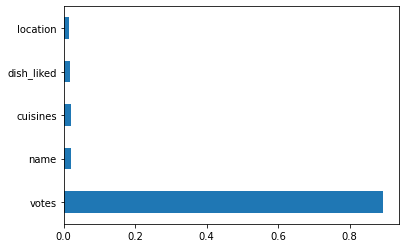

In [40]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(DTree.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [49]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)

RForest.fit(X_train,y_train)
predict=RForest.predict(X_test)

from sklearn.metrics import r2_score
print('R square:',r2_score(y_test,predict))
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

<ipython-input-49-8ae017f90df7>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RForest.fit(X_train,y_train)


R square: 0.9729671798115196
MAE: 0.08000302668100277
MSE: 0.02415525636734276
RMSE: 0.1554196138437577


[0.0207405  0.00232685 0.003538   0.89247781 0.01389462 0.00966911
 0.01667323 0.02134144 0.01135097 0.00189364 0.00131146 0.00478238]


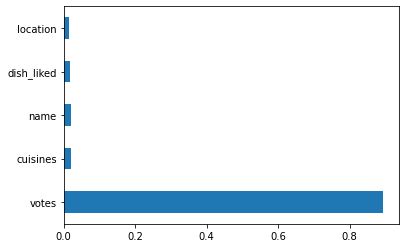

In [50]:
print(RForest.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(RForest.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [51]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,y_train)
y_prediction =ETree.predict(X_test)


from sklearn.metrics import r2_score
print('R square:',r2_score(y_test,y_prediction))
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

<ipython-input-51-b29ab38a7057>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ETree.fit(X_train,y_train)


R square: 0.978930795444933
MAE: 0.05217829104562634
MSE: 0.01882644999431107
RMSE: 0.13720951131139222


[0.02448411 0.00918906 0.04248888 0.65922305 0.0231684  0.02062766
 0.15234992 0.02626985 0.02261333 0.00371011 0.00421785 0.01165778]


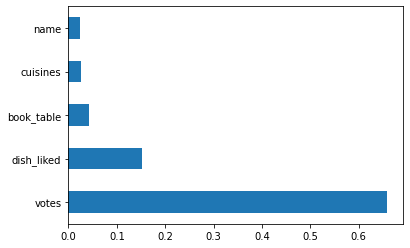

In [44]:
print(ETree.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(ETree.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred =gbr.predict(X_test)

print('R square',r2_score(y_test,y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

C:\Users\Narshinh\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


R square 0.8995385300956635
MAE: 0.20720651720188663
MSE: 0.08976764331874702
RMSE: 0.2996124885894228


In [54]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)
y_predicts=xgb.predict(X_test)

r2_score(y_test,y_predict)
print('MAE:', metrics.mean_absolute_error(y_test, y_predicts))
print('MSE:', metrics.mean_squared_error(y_test, y_predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicts)))

[11:12:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.14011628286859415
MSE: 0.046359214313443926
RMSE: 0.21531190007392514


Random forest Regression gives us the best value  

In [45]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

NameError: name 'rf_random' is not defined